# Getting Started

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from IPython.display import display
from scipy.stats import spearmanr

from input.load import load_df
import analysis

# Preliminary Test

In [3]:
result_summary = pd.read_csv("summary.csv")
test_stability_df = result_summary.loc[139:]
pd.concat([test_stability_df.head(3), test_stability_df.tail(3)])

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note
139,2025-06-17 12:22,Variant_1420_4,data/run/2025-06-17 12:20/config_1420_4.toml,data/result/2025-06-17 12:22_Variant_1420_4/lo...,data/result/2025-06-17 12:22_Variant_1420_4/va...,0.436356,0.012894,0.436166,data/result/2025-06-17 12:22_Variant_1420_4/re...,0:02:17.384209,NaN
140,2025-06-17 12:22,Variant_1_2,data/run/2025-06-17 12:20/config_1_2.toml,data/result/2025-06-17 12:22_Variant_1_2/loss.dat,data/result/2025-06-17 12:22_Variant_1_2/val_l...,0.304395,0.013273,0.304106,data/result/2025-06-17 12:22_Variant_1_2/resul...,0:02:17.445731,NaN
141,2025-06-17 12:22,Variant_1420_0,data/run/2025-06-17 12:20/config_1420_0.toml,data/result/2025-06-17 12:22_Variant_1420_0/lo...,data/result/2025-06-17 12:22_Variant_1420_0/va...,0.444178,0.014118,0.443954,data/result/2025-06-17 12:22_Variant_1420_0/re...,0:02:17.642049,NaN
181,2025-06-17 12:27,Variant_13_1,data/run/2025-06-17 12:20/config_13_1.toml,data/result/2025-06-17 12:27_Variant_13_1/loss...,data/result/2025-06-17 12:27_Variant_13_1/val_...,0.286112,-0.048863,0.281909,data/result/2025-06-17 12:27_Variant_13_1/resu...,0:02:25.823303,NaN
182,2025-06-24 05:04,Quick Test,data/run/qtest.toml,data/result/2025-06-24 05:04_Quick Test/loss.dat,data/result/2025-06-24 05:04_Quick Test/val_lo...,0.270771,0.014625,0.270376,data/result/2025-06-24 05:04_Quick Test/result...,0:00:14.120917,NaN
183,2025-06-24 05:06,Quick Test,data/run/qtest.toml,data/result/2025-06-24 05:06_Quick Test/loss.dat,data/result/2025-06-24 05:06_Quick Test/val_lo...,0.279499,-0.010337,0.279308,data/result/2025-06-24 05:06_Quick Test/result...,0:00:13.796108,NaN


(array([2., 0., 3., 3., 0., 0., 2., 2., 2., 1.]),
 array([0.30143191, 0.30473722, 0.30804253, 0.31134784, 0.31465315,
        0.31795846, 0.32126377, 0.32456908, 0.32787439, 0.3311797 ,
        0.33448501]),
 <BarContainer object of 10 artists>)

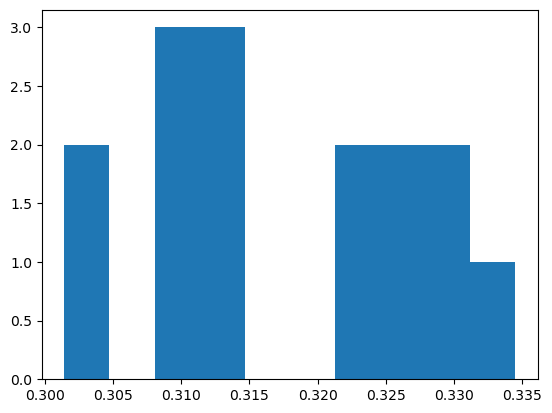

In [21]:
test_stability = {}
for variant in [1, 13, 1420]:
    v_test = test_stability_df[
        test_stability_df["run_name"].str.startswith(f"Variant_{variant}_")
    ]
    rms_dev = v_test["rms_dev"]
    std_diff = v_test["std_diff"]
    test_stability[str(variant)] = {"rms_dev": rms_dev, "std_diff": v_test["std_diff"]}

plt.hist(test_stability["1"]["rms_dev"])

In [2]:
# Load the summary
opt_data_test = pd.read_csv("data/summary/optimum_data_test.csv")

# Extract parameter
opt_data_test["variant_id"] = [
    var_str.split("_")[1] for var_str in opt_data_test["run_name"].values
]
opt_data_test["percent_train_data"] = [
    round(float(var_str.split("_")[2]), 2) * 80
    for var_str in opt_data_test["run_name"].values
]

opt_data_test = opt_data_test.replace([-np.inf, np.inf], [-99, 99])
opt_data_test["percent_train_data"] = opt_data_test["percent_train_data"].round(2)

opt_data_test = opt_data_test[
    [
        "datetime",
        "variant_id",
        "percent_train_data",
        "output_file",
        "rms_dev",
        "mae",
        "std_diff",
        "run_time",
    ]
]
opt_data_test

,datetime,variant_id,percent_train_data,output_file,rms_dev,mae,std_diff,run_time
0,2025-06-17 15:56,2411,4.0,data/result/2025-06-17 15:56_Variant_2411_0.05...,0.384486,-0.004615,0.384459,0:01:32.767520
1,2025-06-17 15:56,2411,9.6,data/result/2025-06-17 15:56_Variant_2411_0.12...,0.308344,0.027265,0.307136,0:02:45.254430
2,2025-06-17 15:56,2411,15.2,data/result/2025-06-17 15:56_Variant_2411_0.19...,0.277486,0.037305,0.274967,0:03:46.080720
3,2025-06-17 15:56,2411,20.0,data/result/2025-06-17 15:56_Variant_2411_0.25...,0.252714,-0.017025,0.252140,0:04:47.489287
4,2025-06-17 15:56,2411,25.6,data/result/2025-06-17 15:56_Variant_2411_0.32...,0.243412,-0.017520,0.242781,0:05:41.312116
...,...,...,...,...,...,...,...,...
1495,2025-06-18 10:43,195,58.4,data/result/2025-06-18 10:43_Variant_195_0.73/...,0.175813,0.003455,0.175779,0:09:49.181442
1496,2025-06-18 10:43,195,64.0,data/result/2025-06-18 10:43_Variant_195_0.80/...,0.189809,0.000140,0.189809,0:10:18.832976
1497,2025-06-18 10:43,195,68.8,data/result/2025-06-18 10:43_Variant_195_0.86/...,0.177340,0.001443,0.177334,0:10:45.793675
1498,2025-06-18 10:43,195,74.4,data/result/2025-06-18 10:43_Variant_195_0.93/...,0.162489,-0.006105,0.162374,0:11:01.680227


(0.0, 1.4874020103185004)

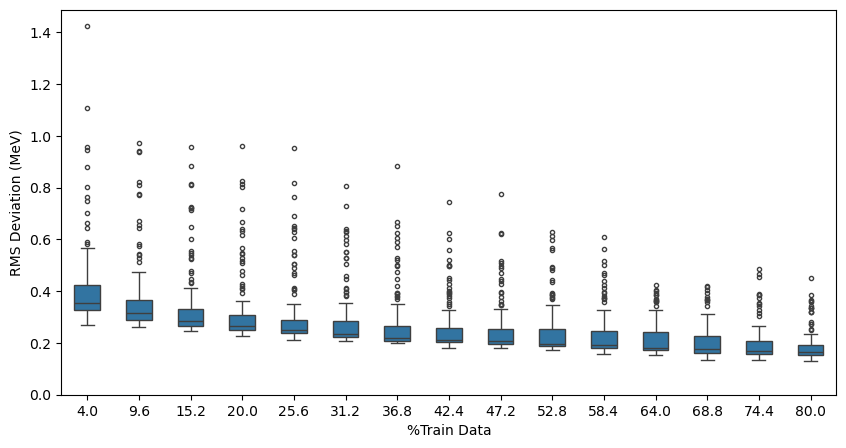

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    x="percent_train_data", y="rms_dev", data=opt_data_test, fliersize=3, width=0.5
)

plt.ylabel("RMS Deviation (MeV)")
plt.xlabel("%Train Data")
plt.ylim(bottom=0)

/tmp/ipykernel_23089/3768936449.py:3: FutureWarning: The provided callable <function mean at 0x7f4e70531760> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  compact_df = compact_df.groupby("percent_train_data", as_index=False).agg(


4    25.6
Name: percent_train_data, dtype: float64
2    15.2
Name: percent_train_data, dtype: float64


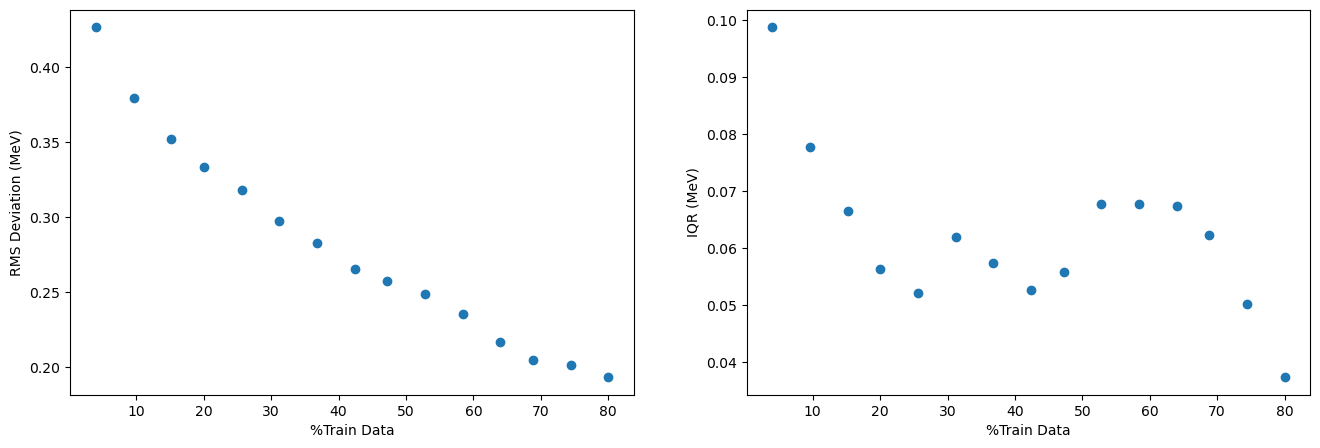

In [50]:
# Groupby
compact_df = opt_data_test[["percent_train_data", "rms_dev"]]
compact_df = compact_df.groupby("percent_train_data", as_index=False).agg(
    mean=("rms_dev", np.mean),
    iqr=("rms_dev", lambda x: x.quantile(0.75) - x.quantile(0.25)),
)

# Determine the optimum
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].scatter(compact_df["percent_train_data"], compact_df["mean"])
ax[0].set_xlabel("%Train Data")
ax[0].set_ylabel("RMS Deviation (MeV)")

ax[1].scatter(compact_df["percent_train_data"], compact_df["iqr"])
ax[1].set_xlabel("%Train Data")
ax[1].set_ylabel("IQR (MeV)")


# IC50-like determination
def det_ic50(col):
    val_max = col.max()
    val_min = col.min()

    half_pos = (val_max - val_min) / 2 + val_min
    delta = col.apply(lambda x: x - half_pos)
    lower_than_half = delta[delta < 0]
    higher_than_half = delta[delta > 0]
    first_closest_value = [
        np.abs(lower_than_half.iloc[0]),
        np.abs(higher_than_half.iloc[-1]),
    ]

    return delta.index[delta.abs() == min(first_closest_value)]


print(compact_df.loc[det_ic50(compact_df["mean"])]["percent_train_data"])
print(compact_df.loc[det_ic50(compact_df["iqr"])]["percent_train_data"])

# Full-scale Simulation

In [2]:
full_result = pd.read_csv("data/summary/full_scale.csv")
full_result["variant_id"] = full_result["run_name"].str.split("_").str[1].astype(int)
full_result["run_time"] = pd.to_timedelta(full_result["run_time"])
full_result.head(3)

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note,variant_id
0,2025-06-19 16:38,variant_1,data/run/2025-06-19 16:33/variant_1.toml,data/result/2025-06-19 16:38_variant_1/loss.dat,data/result/2025-06-19 16:38_variant_1/val_los...,0.257093,-0.000579,0.257092,data/result/2025-06-19 16:38_variant_1/result.csv,0 days 00:05:45.284233,NaN,1
1,2025-06-19 16:38,variant_11,data/run/2025-06-19 16:33/variant_11.toml,data/result/2025-06-19 16:38_variant_11/loss.dat,data/result/2025-06-19 16:38_variant_11/val_lo...,0.255597,0.001484,0.255592,data/result/2025-06-19 16:38_variant_11/result...,0 days 00:05:45.942619,NaN,11
2,2025-06-19 16:38,variant_2,data/run/2025-06-19 16:33/variant_2.toml,data/result/2025-06-19 16:38_variant_2/loss.dat,data/result/2025-06-19 16:38_variant_2/val_los...,0.253046,-0.006678,0.252958,data/result/2025-06-19 16:38_variant_2/result.csv,0 days 00:05:46.215085,NaN,2


In [3]:
# Fix N,Z problem
def fix_ZN_round(row):
    proper_ZN = pd.read_csv("data/result/2025-06-24 05:06_Quick Test/result.csv")
    mt_path = row["output_file"]
    mt = pd.read_csv(mt_path)
    mt[["Z", "N"]] = proper_ZN[["Z", "N"]]
    mt.to_csv(mt_path, index=False)


# full_result.apply(fix_ZN_round, axis=1)

## Global variable test

In [3]:
# Dataset preparation
full_result["moment"] = full_result.apply(analysis.dataset.extract_result, axis=1)
moment_df = pd.concat(
    [full_result["variant_id"], full_result["moment"].apply(pd.Series)], axis=1
)
moment_df.insert(2, "r_std", moment_df["ml_std"] / moment_df["variant_std"])
moment_df.insert(3, "drms", moment_df["ml_rms"] - moment_df["variant_rms"])
display(moment_df)

# Correlation test
target_columns = ["variant_rms", "variant_mean", "variant_std", "variant_skew"]
result_columns = ["rms_dev", "r_std", "drms", "ml_rms", "ml_mean", "ml_std", "ml_skew"]

corr_matrix = pd.DataFrame(index=target_columns, columns=result_columns, dtype=float)

for index in target_columns:
    for column in result_columns:
        corr = moment_df[[index, column]].corr(method="spearman").iloc[0, 1]
        corr_matrix.loc[index, column] = round(corr, 3)

display(corr_matrix)

,variant_id,rms_dev,r_std,drms,variant_rms,variant_mean,variant_std,variant_skew,ml_rms,ml_mean,ml_std,ml_skew
0,1,0.257093,0.920851,-0.032310,0.441481,0.115100,0.426246,-1.520802,0.409172,0.115679,0.392510,-1.219481
1,11,0.255597,0.981874,-0.005700,0.848391,-0.631821,0.566233,-1.348822,0.842691,-0.633305,0.555969,-1.310836
2,2,0.253046,0.988292,0.000019,0.879666,0.638154,0.605498,0.358254,0.879685,0.644832,0.598410,0.475432
3,4,0.255758,0.999723,-0.001261,0.803083,-0.475478,0.647246,-1.004990,0.801821,-0.473590,0.647067,-0.955134
4,3,0.254481,0.967470,-0.015069,0.506061,0.263608,0.432015,-0.962950,0.490991,0.257697,0.417962,-0.719795
...,...,...,...,...,...,...,...,...,...,...,...,...
11017,11011,0.243944,0.872394,-0.028935,0.753208,0.629147,0.414153,0.025799,0.724273,0.627734,0.361305,-0.449961
11018,11015,0.220236,0.969598,-0.014479,1.170394,-0.936801,0.701643,-1.070403,1.155915,-0.934552,0.680312,-0.892688
11019,11018,0.277530,0.908848,-0.034897,0.902588,0.709908,0.557445,0.884777,0.867691,0.704451,0.506633,-0.075572
11020,11013,0.420675,0.865382,-0.112254,0.833142,-0.067556,0.830463,5.386369,0.720888,-0.057241,0.718668,-0.567942


,rms_dev,r_std,drms,ml_rms,ml_mean,ml_std,ml_skew
variant_rms,0.267,0.369,0.124,0.968,-0.129,0.904,0.339
variant_mean,-0.047,-0.012,0.018,-0.129,1.000,-0.073,0.531
variant_std,0.379,0.329,0.027,0.875,-0.071,0.942,0.445
variant_skew,0.673,-0.161,-0.322,0.311,0.290,0.398,0.741


Text(0.5, 0, 'RMS Dev (MeV)')

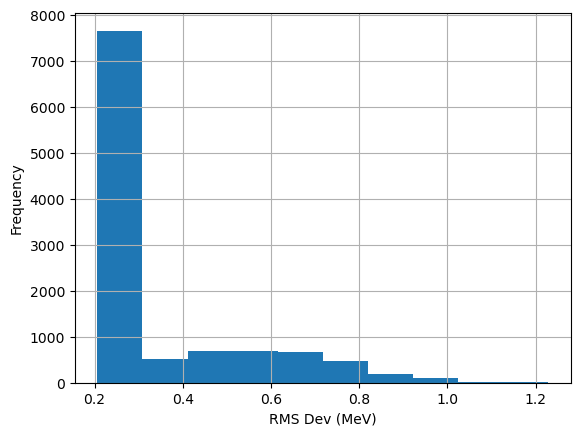

In [4]:
moment_df["rms_dev"].hist()
plt.ylabel("Frequency")
plt.xlabel("RMS Dev (MeV)")

## Nuclear landscape analysis

In [4]:
# Agregate the mass table
# mass_tables = []

# for i in range(11022):
#     mass_table_path = full_result.iloc[i]["output_file"]
#     mass_table_i = np.loadtxt(
#         mass_table_path, skiprows=1, delimiter=",", usecols=range(4)
#     )
#     mass_table_variant = np.array([i + 1] * mass_table_i.shape[0]).reshape(-1, 1)
#     mass_table_i = np.concatenate((mass_table_variant, mass_table_i), axis=1)

#     mass_tables.append(mass_table_i)


# agg_mass_table = np.vstack(mass_tables)
# agg_mass_table_df = pd.DataFrame(agg_mass_table)

# agg_mass_table_df.columns = ["variant_id", "Z", "N", "target", "prediction"]
# agg_mass_table_df["variant_id"] = agg_mass_table_df["variant_id"].astype(int)

# agg_mass_table_df.to_parquet("data/result/full_mass_table.parquet")

agg_mass_table_df = pd.read_parquet("data/result/full_mass_table.parquet")
agg_mass_table_df

,variant_id,Z,N,target,prediction
0,1,8.0,8.0,-0.005479,-0.157275
1,1,8.0,9.0,0.006382,-0.129925
2,1,8.0,10.0,-0.047089,-0.130389
3,1,8.0,11.0,-0.005023,-0.076644
4,1,8.0,12.0,-0.008413,-0.094355
...,...,...,...,...,...
70430575,11022,110.0,245.0,-4.327100,-4.150807
70430576,11022,110.0,246.0,-5.012300,-4.502451
70430577,11022,110.0,247.0,-4.595600,-4.248192
70430578,11022,110.0,248.0,-5.446800,-4.595674


In [5]:
grouped = (
    agg_mass_table_df.groupby(["Z", "N"])
    .agg(
        target_mean=("target", "mean"),
        target_std=("target", "std"),
        prediction_mean=("prediction", "mean"),
        prediction_std=("prediction", "std"),
    )
    .reset_index()
)

raw_epsilon = (
    np.abs(grouped["prediction_mean"] - grouped["target_mean"]) / grouped["target_std"]
)
grouped["epsilon"] = np.where(
    raw_epsilon <= 1, 1, np.where(raw_epsilon <= 2, 2, np.where(raw_epsilon <= 3, 3, 4))
)
grouped["epsilon"] = grouped["epsilon"].astype(int)
grouped["epsilon"] = grouped["epsilon"].map(
    {1: "ε ≤ 1", 2: "1 < ε ≤ 2", 3: "2< ε ≤ 3", 4: "ε ≥ 4"}
)

grouped["sigma"] = np.where(
    grouped["prediction_std"] <= 1,
    1,
    np.where(
        grouped["prediction_std"] <= 2,
        2,
        np.where(grouped["prediction_std"] <= 3, 3, 4),
    ),
)
grouped["sigma"] = grouped["sigma"].astype(int)
grouped["sigma"] = grouped["sigma"].map(
    {1: "σ ≤ 1 MeV", 2: "1 < σ ≤ 2 MeV", 3: "2< σ ≤ 3 MeV", 4: "σ ≥ 4 MeV"}
)

grouped["sigma_t"] = np.where(
    grouped["target_std"] <= 1,
    1,
    np.where(
        grouped["target_std"] <= 2,
        2,
        np.where(grouped["target_std"] <= 3, 3, 4),
    ),
)
grouped["sigma_t"] = grouped["sigma_t"].astype(int)
grouped["sigma_t"] = grouped["sigma_t"].map(
    {1: "σ ≤ 1 MeV", 2: "1 < σ ≤ 2 MeV", 3: "2< σ ≤ 3 MeV", 4: "σ ≥ 4 MeV"}
)

grouped

,Z,N,target_mean,target_std,prediction_mean,prediction_std,epsilon,sigma,sigma_t
0,8.0,8.0,-0.003679,0.035008,-0.058605,0.155605,1 < ε ≤ 2,σ ≤ 1 MeV,σ ≤ 1 MeV
1,8.0,9.0,-0.002099,0.036488,-0.021793,0.150602,ε ≤ 1,σ ≤ 1 MeV,σ ≤ 1 MeV
2,8.0,10.0,-0.034435,0.047818,-0.053259,0.139339,ε ≤ 1,σ ≤ 1 MeV,σ ≤ 1 MeV
3,8.0,11.0,-0.016806,0.053683,-0.010168,0.135294,ε ≤ 1,σ ≤ 1 MeV,σ ≤ 1 MeV
4,8.0,12.0,-0.002974,0.068755,-0.048048,0.149883,ε ≤ 1,σ ≤ 1 MeV,σ ≤ 1 MeV
...,...,...,...,...,...,...,...,...,...
6385,110.0,245.0,-0.193887,2.618051,-0.155826,2.638258,ε ≤ 1,2< σ ≤ 3 MeV,2< σ ≤ 3 MeV
6386,110.0,246.0,-0.532022,2.685208,-0.183581,2.724117,ε ≤ 1,2< σ ≤ 3 MeV,2< σ ≤ 3 MeV
6387,110.0,247.0,-0.379518,2.670558,-0.160359,2.701047,ε ≤ 1,2< σ ≤ 3 MeV,2< σ ≤ 3 MeV
6388,110.0,248.0,-0.876003,2.739946,-0.197065,2.789685,ε ≤ 1,2< σ ≤ 3 MeV,2< σ ≤ 3 MeV


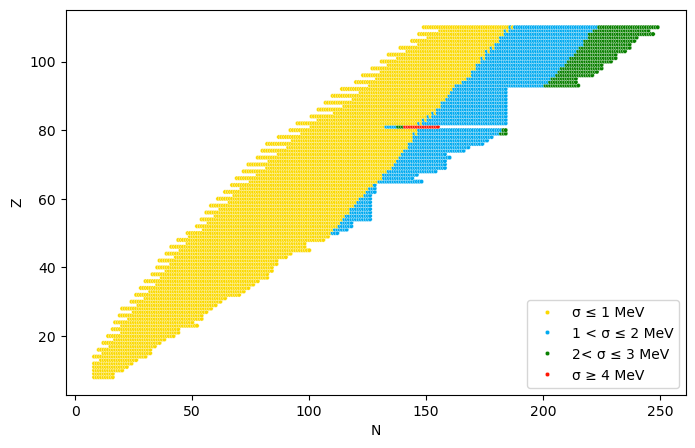

In [6]:
# Variant's Uncertainty Plot
plt.figure(figsize=(8, 5))
colour_map_sig = {
    "σ ≤ 1 MeV": "#FBD900",
    "1 < σ ≤ 2 MeV": "#00AAF0",
    "2< σ ≤ 3 MeV": "#098000",
    "σ ≥ 4 MeV": "#FF1503",
}
hue_order_sig = ["σ ≤ 1 MeV", "1 < σ ≤ 2 MeV", "2< σ ≤ 3 MeV", "σ ≥ 4 MeV"]
sns.scatterplot(
    data=grouped,
    x="N",
    y="Z",
    hue="sigma_t",
    palette=colour_map_sig,
    s=10,
    hue_order=hue_order_sig,
)

plt.legend(title="", loc="lower right")

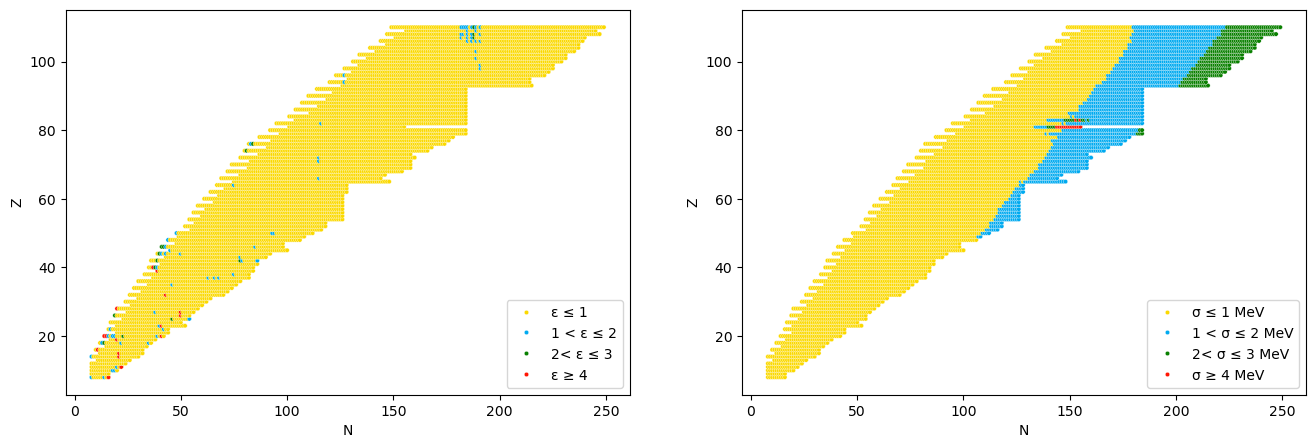

In [7]:
# ML's Error and Uncertainty plot
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

colour_map_eps = {
    "ε ≤ 1": "#FBD900",
    "1 < ε ≤ 2": "#00AAF0",
    "2< ε ≤ 3": "#098000",
    "ε ≥ 4": "#FF1503",
}
hue_order_eps = ["ε ≤ 1", "1 < ε ≤ 2", "2< ε ≤ 3", "ε ≥ 4"]

sns.scatterplot(
    data=grouped,
    x="N",
    y="Z",
    hue="epsilon",
    palette=colour_map_eps,
    s=10,
    hue_order=hue_order_eps,
    ax=ax[0],
)
ax[0].legend(title="", loc="lower right")

colour_map_sig = {
    "σ ≤ 1 MeV": "#FBD900",
    "1 < σ ≤ 2 MeV": "#00AAF0",
    "2< σ ≤ 3 MeV": "#098000",
    "σ ≥ 4 MeV": "#FF1503",
}
hue_order_sig = ["σ ≤ 1 MeV", "1 < σ ≤ 2 MeV", "2< σ ≤ 3 MeV", "σ ≥ 4 MeV"]
sns.scatterplot(
    data=grouped,
    x="N",
    y="Z",
    hue="sigma",
    palette=colour_map_sig,
    s=10,
    hue_order=hue_order_sig,
    ax=ax[1],
)

ax[1].legend(title="", loc="lower right")

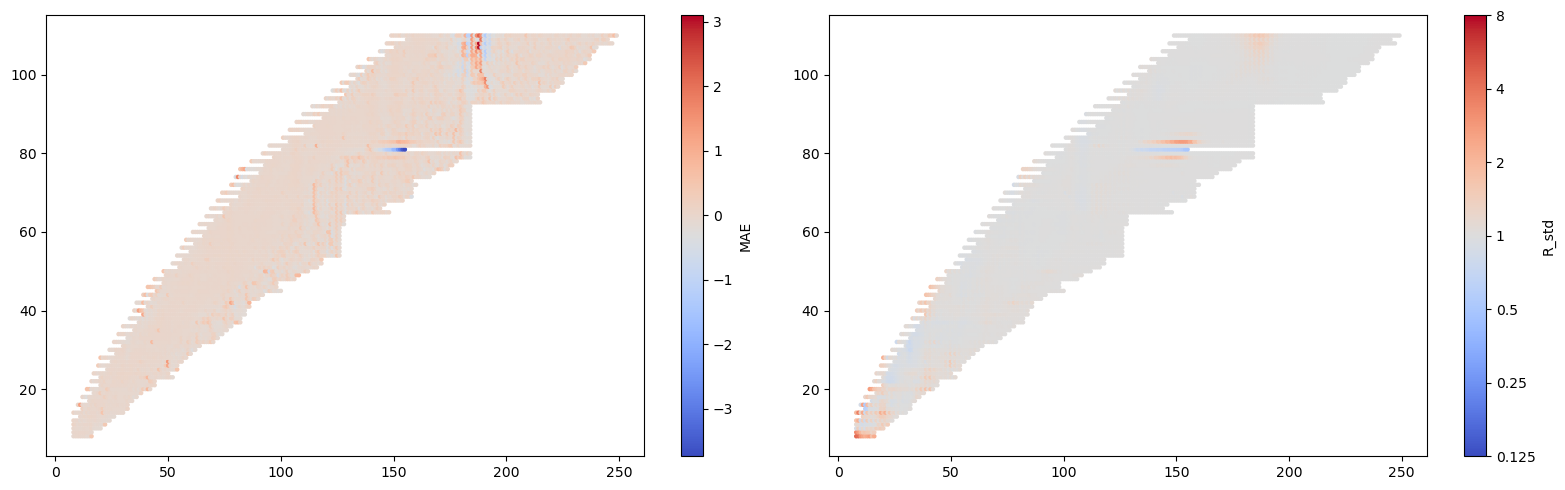

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
grouped["mae"] = grouped["prediction_mean"] - grouped["target_mean"]
grouped["r_std"] = np.log2(grouped["prediction_std"] / grouped["target_std"])

sc_mae = ax[0].scatter(
    grouped["N"], grouped["Z"], c=grouped["mae"], s=5, cmap="coolwarm"
)
fig.colorbar(sc_mae, ax=ax[0], label="MAE")

sc_rstd = ax[1].scatter(
    grouped["N"],
    grouped["Z"],
    c=grouped["r_std"],
    s=5,
    cmap="coolwarm",
    vmin=-3,
    vmax=3,
)
cbar_rstd = fig.colorbar(sc_rstd, ax=ax[1], label="R_std")

ticks = np.arange(-3, 4)
cbar_rstd.set_ticks(ticks)
cbar_rstd.set_ticklabels([f"{2**i}" for i in range(-3, 4)])

plt.tight_layout()

In [18]:
grouped[grouped["r_std"] > 2]

,Z,N,target_mean,target_std,prediction_mean,prediction_std,epsilon,sigma,sigma_t,mae,r_std
0,8.0,8.0,-0.003679,0.035008,-0.058605,0.155605,1 < ε ≤ 2,σ ≤ 1 MeV,σ ≤ 1 MeV,-0.054926,2.152121
1,8.0,9.0,-0.002099,0.036488,-0.021793,0.150602,ε ≤ 1,σ ≤ 1 MeV,σ ≤ 1 MeV,-0.019693,2.045252


## Skyrme Parameter

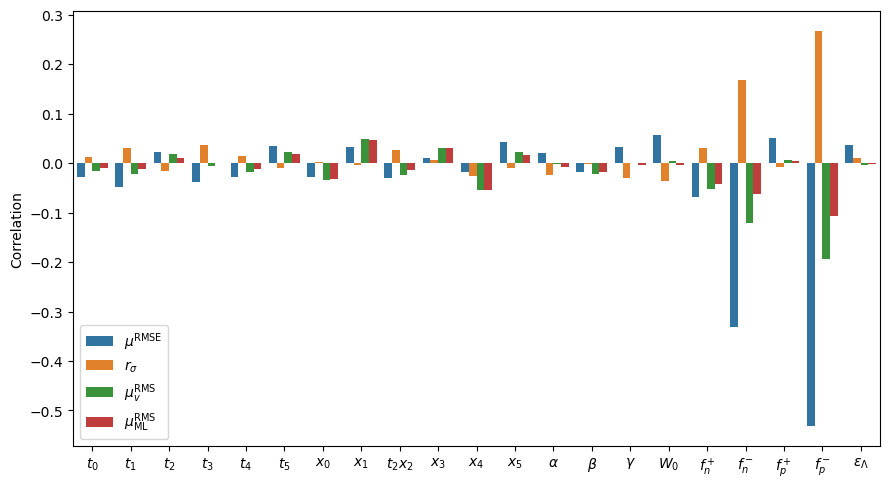

In [39]:
# Load skyrme param
skyrme_param, _ = load_df("variant", "ext")
skyrme_param = pd.concat(
    [skyrme_param["varian_id"], skyrme_param.iloc[:, 2:23]], axis=1
)
skyrme_param.rename(columns={"varian_id": "variant_id"}, inplace=True)

# Set x_2 to t_2.x_2
skyrme_param["param(09)"] = skyrme_param["param(09)"] * skyrme_param["param(03)"]

# Set param to relative param i.e. (param_variant - param_bsk)
skyrme_param.iloc[:, 1:] = skyrme_param.apply(
    analysis.dataset.relative_skyrme, axis=1, result_type="expand"
)

moment_n_skyrme = pd.merge(
    moment_df[["variant_id", "rms_dev", "r_std", "variant_rms", "ml_rms"]],
    skyrme_param,
    on="variant_id",
    how="inner",
)


# Correlation test
target_columns = ["rms_dev", "r_std", "variant_rms", "ml_rms"]
result_columns = [col for col in moment_n_skyrme.columns if col.startswith("param")]

corr_matrix = pd.DataFrame(index=target_columns, columns=result_columns, dtype=float)

for index in target_columns:
    for column in result_columns:
        corr = moment_n_skyrme[[index, column]].corr(method="spearman").iloc[0, 1]
        corr_matrix.loc[index, column] = round(corr, 3)

# display(corr_matrix)

column_name = [
    r"$t_0$",
    r"$t_1$",
    r"$t_2$",
    r"$t_3$",
    r"$t_4$",
    r"$t_5$",
    r"$x_0$",
    r"$x_1$",
    r"$t_2 x_2$",
    r"$x_3$",
    r"$x_4$",
    r"$x_5$",
    r"$\alpha$",
    r"$\beta$",
    r"$\gamma$",
    r"$W_0$",
    r"$f_n^+$",
    r"$f_n^-$",
    r"$f_p^+$",
    r"$f_p^-$",
    r"$\epsilon_\Lambda$",
]

index_name = [
    r"$\mu^\text{RMSE}$",
    r"$r_\sigma$",
    r"$\mu_v^\text{RMS}$",
    r"$\mu_\text{ML}^\text{RMS}$",
]


corr_matrix.columns = column_name
corr_matrix.index = index_name

# Reshape the DataFrame from wide → long (for plotting)
corr_matrix_long = corr_matrix.reset_index().melt(
    id_vars="index", var_name="data", value_name="value"
)
corr_matrix_long = corr_matrix_long.rename(columns={"index": "parameter"})

plt.figure(figsize=(9, 5))
sns.barplot(data=corr_matrix_long, x="data", y="value", hue="parameter")

plt.ylabel("Correlation")
plt.xlabel("")
plt.legend(loc="lower left")
plt.tight_layout()